# SPRINT 3 - PROJECT

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [4]:
# mostrar información del DataFrame
orders.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# mostrar información del DataFrame
products.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# mostrar información del DataFrame
aisles.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
# mostrar información del DataFrame
order_products.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Respuesta

Para comenzar tuvve que importar 'pandas' y para las demás secciones importé 'pyplot'. Posteriormente, mediante el método .info() me pude dar cuenta que los datos estaban separados por ';', por lo tanto, utilicé ese carácter como separador para leerlos de manera apropiada. 

Al revisar los datos, puedo observar que algunos cuentan con valores ausentes, como la columna 'days_since_prior_order' del data frame 'orders'; 'product_name' del data frame 'products' y 'add_to_cart_order' de 'order_products'. El data frame 'order_products' contiene una gran cantidad de valores por lo que decidí utilizar (show_counts= True) para obtener correctamente todos los datos. 

En cuanto a los datos, hasta este punto puedo observar que quizá algunas columnas contienen valores tipo de día y hora, tendré que explorar más a detalle para verificar si se requiere hacer algun tipo de conversión.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

# Respuesta

- Los datos con ID tienen el tipo int64 lo que corresponde a un número entero.
- Para los valores ausentes de los data frames antes mencionados, pienso utilizar .isna( ) / .isnull( ) principalmente, combinado con sum( ) o count( ) según sea el caso. Analizar las columnas con valores ausentes e iterar sobre ellas para mostrar la razón de la ausencia. 
- Para los valores duplicados planeo utilizar .duplicated( ) sobre el data frame o sobre alguna columna en específico (según sea el caso) y entender el por qué se marca como un valor duplicado. En caso de ser necesario, utilizar .drop_duplicates( ) acompañado de un .reset_index( ) y por último guardar los cambios en el data frame con inplace = True.



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
orders.duplicated().sum()


15

In [9]:
# Mostrar los valores duplicados
duplicates_values = orders.duplicated()

duplicated_rows = orders[duplicates_values]
duplicated_rows

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

# Respuesta

Los pedidos se hicieron el día miércoles a las 2:00 am

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
filtered_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
filtered_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

In [11]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace= True)
orders.reset_index(inplace= True, drop= True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
478947    False
478948    False
478949    False
478950    False
478951    False
Name: order_id, Length: 478952, dtype: bool

Describe brevemente tus hallazgos y lo que hiciste con ellos

# Respuesta

- se encontraron algunos valores duplicados que correspondían a pedidos en un mismo día (miércoles) a una misma hora (2:00 am) por lo tanto se eliminaron esos duplicados.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()


0

In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()

49673

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()


products['product_name'].duplicated().sum()

1361

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(products['product_name'].duplicated()) & (~products['product_name'].isnull())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [18]:
products.drop_duplicates(subset=['product_name'], inplace=True)


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48333 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48333 non-null  int64 
 1   product_name   48332 non-null  object
 2   aisle_id       48333 non-null  int64 
 3   department_id  48333 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- en el data frame, en la columna de 'product_name' había unos nombres duplicados. 
- los convertí a mayúsculas para visualizar mejor la información y posteriormente se eliminaron esas entradas. 

### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- en el data frame departments no se encontraron duplicados en la columna 'department_id' que es un numero identificador único de cada departamento de víveres, por esa razón no hubo duplicados.

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- como en el caso anterior, la columna 'aisle_id' contiene un número que identifica de manera única, por lo que no se mostraron valores duplicados.

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products['reordered'].duplicated().count()

4545007

In [26]:
order_products['reordered'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: reordered, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- los valores de la columna 'reordered' están expresados en 0's y 1's; 
- 0 para cuando el cliente nunca ha pedido un producto en específico antes
- 1 para cando lo ha pedido
- si analizamos esta columna obtendremos valores duplicados, sin embargo, es lógico y normal que aparezcan estos valores de esta manera pues como menciono solo se expresan en 0's y 1's pero no son valores duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [28]:
products.isnull().sum()

product_id       0
product_name     1
aisle_id         0
department_id    0
dtype: int64

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
productos_ausentes = products[products['product_name'].isnull()]
productos_ausentes

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_ausentes_en_pasillo_100 = productos_ausentes[productos_ausentes['aisle_id'] == 100]
productos_ausentes_en_pasillo_100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_ausentes_en_departamento_21 = productos_ausentes[productos_ausentes['department_id'] == 21]
productos_ausentes_en_departamento_21

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
merged_df = pd.merge(departments, aisles, left_on='department_id', right_on='aisle_id')
specific_row = merged_df[(merged_df['aisle_id'] == 100) & (merged_df['department_id'] == 21)]

specific_row

,department_id,department,aisle_id,aisle


In [33]:
# Esta línea de código sólo la utilicé para comprobar mi resultado.
filtered_data = products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]
filtered_data


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

In [35]:
print(products.iloc[[37]])

    product_id product_name  aisle_id  department_id
37          38      Unknown       100             21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- en el data frame, dentro de la columna 'product_name' encontramos un valor ausente. 
- el valor ausente se encontraba dentro del pasillo con ID 100, y departamento con ID 21. ('NaN')
- fusioné las tablas 'department' y 'aisle' para revisar y finalmente, 
- con .fillna modifiqué el valor ausente por la palabra 'unknown'

### `orders` data frame

In [36]:
# Encuentra los valores ausentes
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [37]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders.query('order_number > 1').isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- inicialmente muestra valores ausentes para la columna days_since_prior_order, sin embargo, esta columna contiene valores que no se pueden verificar de forma tan simple, ya que representan números de días transcurridos desde el periodo anterior.
- con el método query() se pudo verificar que todos aquellos valores que fueran mayores a 1, es decir, que mínimo hubieran realizado ya un pedido, los contabilizara y de esta forma se descartaron los valores ausentes.

### `order_products` data frame

In [10]:
# Encuentra los valores ausentes
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [11]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor Mínimo:', order_products['add_to_cart_order'].min())
print('Valor Máximo:', order_products['add_to_cart_order'].max())

Valor Mínimo: 1.0
Valor Máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

# Respuesta

- este data frame contiene información de los pedidos, donde cada fila es un articulo pedido en un pedido.
- la columna 'add_to_cart_order' que es el orden secuencial en el que se añaden articulos al carrito de compras contiene algunos valores ausentes.
- hasta ahorita el valor minimo es de 1.0
- el valor máximo de artículos registrado es de 64.0

In [30]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_valor_ausente = order_products[order_products['add_to_cart_order'].isna()]
pedidos_valor_ausente['order_id']

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [46]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
pedidos_mayor_64 = pedidos_valor_ausente['product_id'].count() > 64
pedidos_mayor_64

True

In [47]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
order_products_filtrado = order_products[order_products['order_id'].isin(pedidos_valor_ausente['order_id'])]
order_products_filtrado

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57,1
737,2449164,5068,999,0
1742,2997021,4920,37,0
3463,871281,40063,61,1
3535,171934,36397,7,0
...,...,...,...,...
4543519,2621907,32018,28,1
4544672,102236,34688,49,0
4544708,2256933,41544,21,0
4544771,180546,12741,46,1


In [40]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
productos_por_pedido = order_products_filtrado.groupby('order_id')['product_id'].count()
productos_por_pedido.sort_values(ascending= True)



order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [38]:
productos_por_pedido.min()

65

In [41]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [42]:
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Respuesta

- para poder trabajar con los valores ausentes y tener mejor control sobre de ellos al momento de procesar la información se rellenaron con eoss valores con la cantidad '999'. 
- otro aspecto que estaba impidiendo la manipulación correcta de los datos, es que la columna add_to_cart_order, que expresa un orden secuencial en el que se añadió cada articulo al carrito de compras, estaba expresado en valor 'float', cuando en la realidad un numero entero representa un artículo. por lo que se modificaron los valores de esa colmna para que se expresen en 'int64' 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

# Respuesta

- para comenzar a manipular de forma adecuada la informacion contenida en los distintos data frames, era necesario realizar primero los pasos anteriores: 
- buscar por valores duplicados y si aplica eliminarlos.
- buscar por valores ausentes y si aplica eliminarlos o modificarlos. 
- asegurarse de que la información está en la forma mas adecuada para procesarla y analizarla posteriormente. 



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [47]:
min_value = orders['order_hour_of_day'].min()
max_value = orders['order_hour_of_day'].max()

print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)

Valor mínimo: 0
Valor máximo: 23


In [48]:
min_value = orders['order_dow'].min()
max_value = orders['order_dow'].max()

print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)

Valor mínimo: 0
Valor máximo: 6


Escribe aquí tus conclusiones

# Respuesta

- 'order_hour_of_day' es una columna que representa las horas del día en un formato de 24 hrs. con el codigo se confirma que el valor mínimo es 0 y el máximo 23 por lo que nos aseguramos de que efectivamente estemos trabajando con ese formato. 
- 'order_dow' columna que expresa los días de la semana, comenzando en 0 por domingo y termina en 6 que es sábado. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

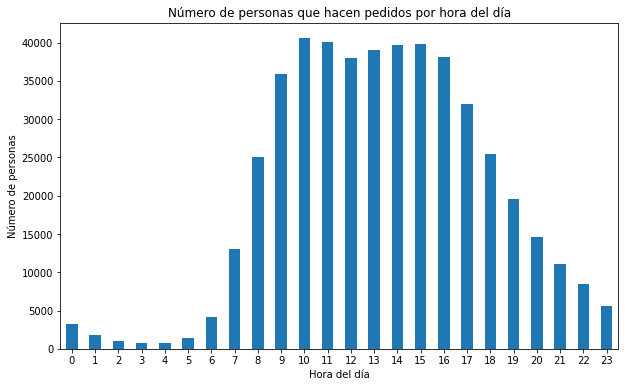

In [49]:
pedidos_por_hora = orders.groupby('order_hour_of_day')['order_id'].count()

pedidos_por_hora.plot(kind='bar',
                     rot= 0,
                     figsize=(10, 6)
                     )

plt.title('Número de personas que hacen pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')

plt.show()



Escribe aquí tus conclusiones

# Respuesta

- el gráfico muestra el número de personas que hacen pedidos por hora del día. 
- vemos una marcada concentración entre las 9 am a 11 am; posteriormente disminuye un poco para el medio día y para en la tarde durante los horarios regulares de comida y hasta las 16 hrs se mantiene la mayor presencia de personas realizando pedidos. 
- las horas del día con menor actividad son mientras las personas regularmente duermen, de 12 am a 7 am. 
- por las tardes (después de las 16 hrs pm) se puede observar como va disminuyendo por hora la cantidad de personas haciendo pedidos. 

### [A3] ¿Qué día de la semana compran víveres las personas?

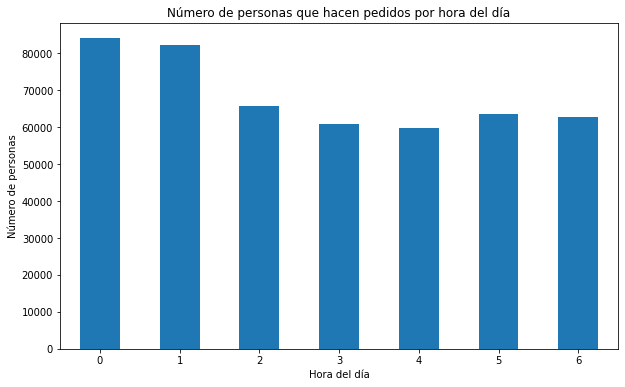

In [50]:
pedidos_por_dia = orders.groupby('order_dow')['order_id'].count()

pedidos_por_dia.plot(kind='bar',
                     rot= 0,
                     figsize=(10, 6)
                     )

plt.title('Número de personas que hacen pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')

plt.show()

Escribe aquí tus conclusiones

# Respuesta

- los principales días para las compras son el domingo y lunes con poco más de 80000 personas haciendo compras. 
- posteriormente, los siguientes días de la semana se mantiene en una cantidad similar que ronda los 60 a 70 mil personas.
- esto coincide un poco con la lógica de que las personas realizan sus pedidos domingo o lunes para tener víveres para el resto de la semana. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

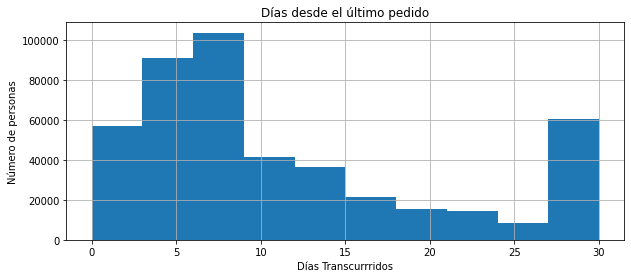

In [21]:

plt.figure(figsize=(10, 4))
orders['days_since_prior_order'].hist()
plt.title('Días desde el último pedido')
plt.xlabel('Días Transcurrridos')
plt.ylabel('Número de personas')

plt.show()

In [52]:
print(f"Valor mínimo: {orders['days_since_prior_order'].min()}, Valor máximo: {orders['days_since_prior_order'].max()}")

Valor mínimo: 0.0, Valor máximo: 30.0


Escribe aquí tus conclusiones

# Respuesta

- esto va un poco con el gráfico anterior, tenemos algunas compras en 0 que quizá son compras 'rápidas' de pocos artículos que se ocupan de urgencia o simplemente resurtir algo faltante.
- donde vemos mayor concentración es en el tiempo de espera de 4 a 9 días, que según la lógica las personas hacen sus compras para la semana (7 días) o para la quincena (15 días), inclusive en algunos casos las compras pueden ser por el mes completo.
- posteriormente el número va disminuyendo a medida que pasan los días.
- observamos un ligero repunte para el último día del mes que, una vez más, respondiendo a la lógica es cuando los víveres comienzan a escasear.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

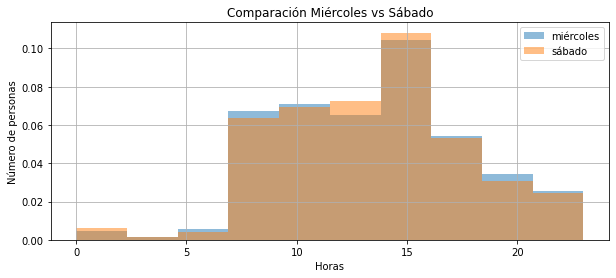

In [53]:
plt.figure(figsize=(10, 4))

orders.query('order_dow == 4')['order_hour_of_day'].hist(label='miércoles', density= True, alpha=0.5)
orders.query('order_dow == 6')['order_hour_of_day'].hist(label='sábado', density= True, alpha=0.5)

plt.legend()
plt.title('Comparación Miércoles vs Sábado')
plt.xlabel('Horas')
plt.ylabel('Número de personas')
plt.show()

Escribe aquí tus conclusiones

# Respuesta

- es muy similar, ligeramente mayor el miércoles, sin embargo, lo que podemos observar es que más allá del día quizá es el horario el factor más determinante para realizar los pedidos, pues vemos que el horario donde uno tiene un incremento el otro tamién, y donde uno tiene un decremento el otro igual.  

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

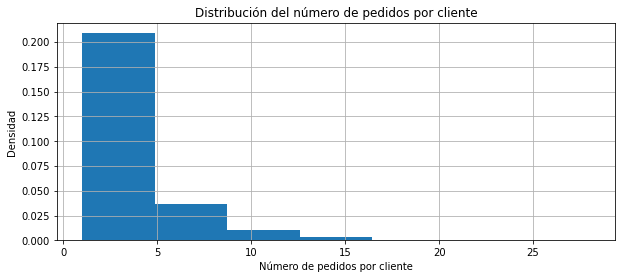

In [54]:
plt.figure(figsize=(10, 4))

distribution = orders.groupby('user_id')['order_id'].count().hist(density=True, bins= 7)


plt.xlabel('Número de pedidos por cliente')
plt.ylabel('Densidad')
plt.title('Distribución del número de pedidos por cliente')

plt.show()


Escribe aquí tus conclusiones

# Respuesta

- esto sugiere que la cantidad de clientes que han realizado de 0 a 5 pedidos es donde encontramos la mayor presencia de la distribución del número de pedidos por cliente. 
- posteriormente ésta disminuye gradualmente a medida que aumenta el número de pedidos.
- podemos concluir que la mayoría de clientes realizan un promedio de 1 a 5 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [55]:
products_merge = products.merge(order_products, on='product_id', how='outer')

In [56]:
products_filter = products_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending= False)

In [57]:
products_filter.head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

# Respuesta

- el top 3 de productos más populares: banana, bag of organic bananas (banana también) y organic strawberries. 
- tanto por el top 20, como por el top 3 de productos más populares nos podemos dar cuenta que la gran mayoría pertenecen al segmento de frutas y verduras.
- lo anterior tiene cierta lógica porque son productos básicos y necesarios, también son individualmente económicos en comparación de otro tipo de alimentos procesados, y por lo tanto son perecederos, lo que quiere decir que las compras son mas recurrentes debido a su caducidad limitada.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [58]:
order_products.groupby('order_id')['product_id'].count().sort_values(ascending= False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

In [59]:
order_products.groupby('order_id')['product_id'].mean().sort_values(ascending= False)

order_id
870376     49691.0
2779211    49683.0
1435604    49683.0
1723881    49683.0
4802       49683.0
            ...   
1402634        1.0
101004         1.0
1034058        1.0
367482         1.0
3164945        1.0
Name: product_id, Length: 450046, dtype: float64

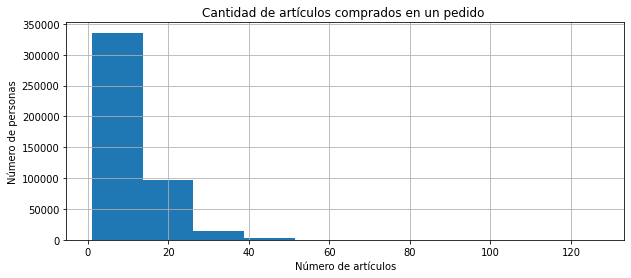

In [60]:
plt.figure(figsize=(10, 4))

order_products.groupby('order_id')['product_id'].count().hist()

plt.xlabel('Número de artículos')
plt.ylabel('Número de personas')
plt.title('Cantidad de artículos comprados en un pedido ')
plt.show()

Escribe aquí tus conclusiones

# Respuesta

- la gran mayoría de personas compra en un solo pedido alrededor de 1 a 15 artículos. 
- posterior a eso, la cantidad de artículos comprados oscila entre 15 y 25 artículos.
- las personas que compran más artículos es notablemente inferior.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [61]:
reordered_order_products_names = pd.merge(order_products.query('reordered == 1'), products, on='product_id', how='left')

In [62]:
reordered_order_products_names.groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered', ascending= False).head(20)

,product_name,reordered
2484,BANANA,55763
2340,BAG OF ORGANIC BANANAS,44450
22917,ORGANIC STRAWBERRIES,28639
20429,ORGANIC BABY SPINACH,26233
21590,ORGANIC HASS AVOCADO,23629
20400,ORGANIC AVOCADO,18743
23362,ORGANIC WHOLE MILK,16251
15892,LARGE LEMON,15044
22453,ORGANIC RASPBERRIES,14748
30822,STRAWBERRIES,13945


Escribe aquí tus conclusiones

# Respuesta

- la mayoría de los artículos pertenecen al segmento de frutas y verduras, podemos observar algunos lácteos también que es lo que usualmente se consume en una familia o persona promedio. 
- hace sentido el listado por que son productos de bajo costo y perecederos, se utilizan practicamente todos los días por lo que las personas los 're-ordenan' constantemente según la información presentada.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [63]:
reordered_by_product = order_products.pivot_table(
    index= 'product_id',
    columns= 'reordered',
    values= 'order_id',
    aggfunc= 'count'
)

In [64]:
reordered_by_product['reordered_rate'] = reordered_by_product[1] / (reordered_by_product [0] + reordered_by_product [1])

In [65]:
reordered_by_product

reordered,0,1,reordered_rate
product_id,,,
1,122.0,158.0,0.564286
2,11.0,NaN,NaN
3,11.0,31.0,0.738095
4,24.0,25.0,0.510204
7,1.0,1.0,0.500000
...,...,...,...
49690,1.0,4.0,0.800000
49691,41.0,31.0,0.430556
49692,7.0,5.0,0.416667


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [66]:
merged_df = pd.merge(order_products, orders, on='order_id')

In [67]:
reordered_by_user = merged_df.groupby('user_id')['reordered'].agg(['count', 'sum'])
reordered_by_user['reorder_ratio'] = reordered_by_user['sum'] / reordered_by_user['count']

reordered_by_user

,count,sum,reorder_ratio
user_id,,,
2,26,1,0.038462
4,2,0,0.000000
5,12,8,0.666667
6,4,0,0.000000
7,14,13,0.928571
...,...,...,...
206203,27,6,0.222222
206206,21,15,0.714286
206207,46,41,0.891304


Escribe aquí tus conclusiones

# Respuesta

- de acuerdo con los valores mostrados, vemos cantidades que oscilan entre 0.03 y 0.90 aproximadamente.
- el promedio de reorder_ratio es 0.49, por lo que podríamos decir que casi la mitad de los productos que lleva una persona ya habían sido adquiridos por ésta. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [25]:
add_to_cart_first = order_products[order_products['add_to_cart_order'] == 1]

In [26]:
top_products = add_to_cart_first['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'count']

In [27]:
top_products = top_products.head(20)

In [28]:
result = pd.merge(top_products, products[['product_id', 'product_name']], on='product_id', how='inner')
result

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a> 
    Respuesta

- Los 20 principales artículos que la gente pone primero en sus carritos tienen que ver con la tendencia que se ha visto en los ejercicios anteriores, definitivamente la gran mayoría son productos del segmento de 'frutas y verduras'.
- Simplemente dentro del top 5, observamos primeramente 'banana' y después otra presentación (bag) del mismo producto.
- Adicional a esto, el resto de artículos lo completan los productos que se pueden considerar de uso recurrente para la gran mayoría de personas como agua, leche y por supuesto frutas y verduras.
</div>



### Conclusion general del proyecto:

# Respuesta

La tienda Instacart lleva un amplio registro de sus pedidos, clientes, reordenes, horas del día, días de la semana, etc. almacenadas en data frames. Con esta información (y más) ahora pueden tomar decisiones sobre: 
- que productos son los más populares
- que días del mes son los que reciben más pedidos
- que hora del día es cuando las personas estan realizando sus compras
- si las personas están comprando lo mismo o se deciden por llevar otros productos, etc. 

Con toda está información ahora son capaces de implementar estrategias que van desde destinar mas servidores y recuros a las horas con mayor demanda para recibir la mayor cantidad de pedidos posibles sin que la aplicación se detenga o tenga errores hasta tener mas producto en stock de sus artículos con mayor demanda y reducir o replantear si vale la pena seguir ofreciedo aquellos artículos que tienen pocas ventas. 

Como lo mencioné en el punto anterior, la primera parte fue hacer una limpieza de los datos (encontrar duplicados y valores ausentes) para asegurar la calidad de la información en el siguiente paso del análisis. 